<a href="https://colab.research.google.com/github/SampritiMayra/Data_Analysis_prep/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **MNIST database** of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. 

In [1]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [2]:
#loading data
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### **Using Padding to prevent info loss in images**

CNNs typically expect inputs to have a specific format, commonly represented as (batch_size, height, width, channels).

When working with images in CNNs, the "channels" dimension refers to the color channels of the image. In the case of MNIST, the images are grayscale, so they have only one channel. Therefore, the initial shape of each MNIST image is (28, 28, 1).

However, the CNN architecture usually expects a 4-dimensional tensor as input, with the first dimension representing the batch size (the number of images in each batch). So, before feeding the data into the CNN, the images are reshaped to include the batch size dimension. 

The final shape of the MNIST data becomes (batch_size, 28, 28, 1), where each image is represented as a 28x28 matrix with one channel.

In [3]:
#checking the shape before reshaping
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [5]:
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0


In [7]:
#defining model
model=Sequential()


In [8]:
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))


In [9]:
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))

In [10]:
#adding output layer
model.add(Dense(10,activation='softmax'))

In [11]:
#compiling the model
#in sparse categorical crossentropy we dont need to do one hot encoding
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [21]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [19]:
# Implementation of early stopping and Saving best model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [20]:
#fitting the model
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2,callbacks = [es, mc])

Epoch 1/25
1500/1500 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9988
Epoch 1: val_accuracy improved from -inf to 0.99300, saving model to best_model.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0408 - val_accuracy: 0.9930
Epoch 2/25
1487/1500 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9989
Epoch 2: val_accuracy improved from 0.99300 to 0.99358, saving model to best_model.h5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0434 - val_accuracy: 0.9936
Epoch 3/25
1490/1500 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 0.9987
Epoch 3: val_accuracy did not improve from 0.99358
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0416 - val_accuracy: 0.9929
Epoch 4/25
1493/1500 [============================>.] - ETA: 0s - loss: 0.0036 - accura

In [26]:
history.history["accuracy"]

[0.9987708330154419,
 0.9988541603088379,
 0.9987083077430725,
 0.9989791512489319,
 0.9991041421890259,
 0.9991250038146973,
 0.9985833168029785,
 0.9986249804496765,
 0.9993333220481873,
 0.9990624785423279,
 0.9992708563804626,
 0.9989374876022339,
 0.9991458058357239,
 0.9992499947547913,
 0.9990208148956299,
 0.99979168176651,
 0.9989791512489319,
 0.9987708330154419,
 0.9992291927337646,
 0.9990624785423279,
 0.9993333220481873]

In [22]:
saved_model = load_model('best_model.h5')

In [23]:
y_pred = saved_model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[3.6032234e-32, 5.5020433e-31, 7.8618710e-27, ..., 1.0000000e+00,
        1.1978652e-32, 1.2711772e-32],
       [2.0079746e-26, 2.0809260e-26, 1.0000000e+00, ..., 7.0343228e-31,
        1.3871739e-34, 8.1655635e-38],
       [9.3012459e-15, 1.0000000e+00, 6.2313236e-17, ..., 1.5581655e-13,
        9.8511362e-14, 1.8153041e-14],
       ...,
       [0.0000000e+00, 2.7639164e-35, 0.0000000e+00, ..., 3.8917286e-28,
        2.8934832e-24, 3.3630290e-28],
       [5.2084007e-29, 1.0990085e-33, 0.0000000e+00, ..., 0.0000000e+00,
        1.4567634e-22, 2.3380065e-26],
       [8.9285403e-26, 2.4752428e-36, 0.0000000e+00, ..., 0.0000000e+00,
        1.3028764e-33, 3.9069630e-34]], dtype=float32)

313/313 [==============================] - 1s 2ms/step


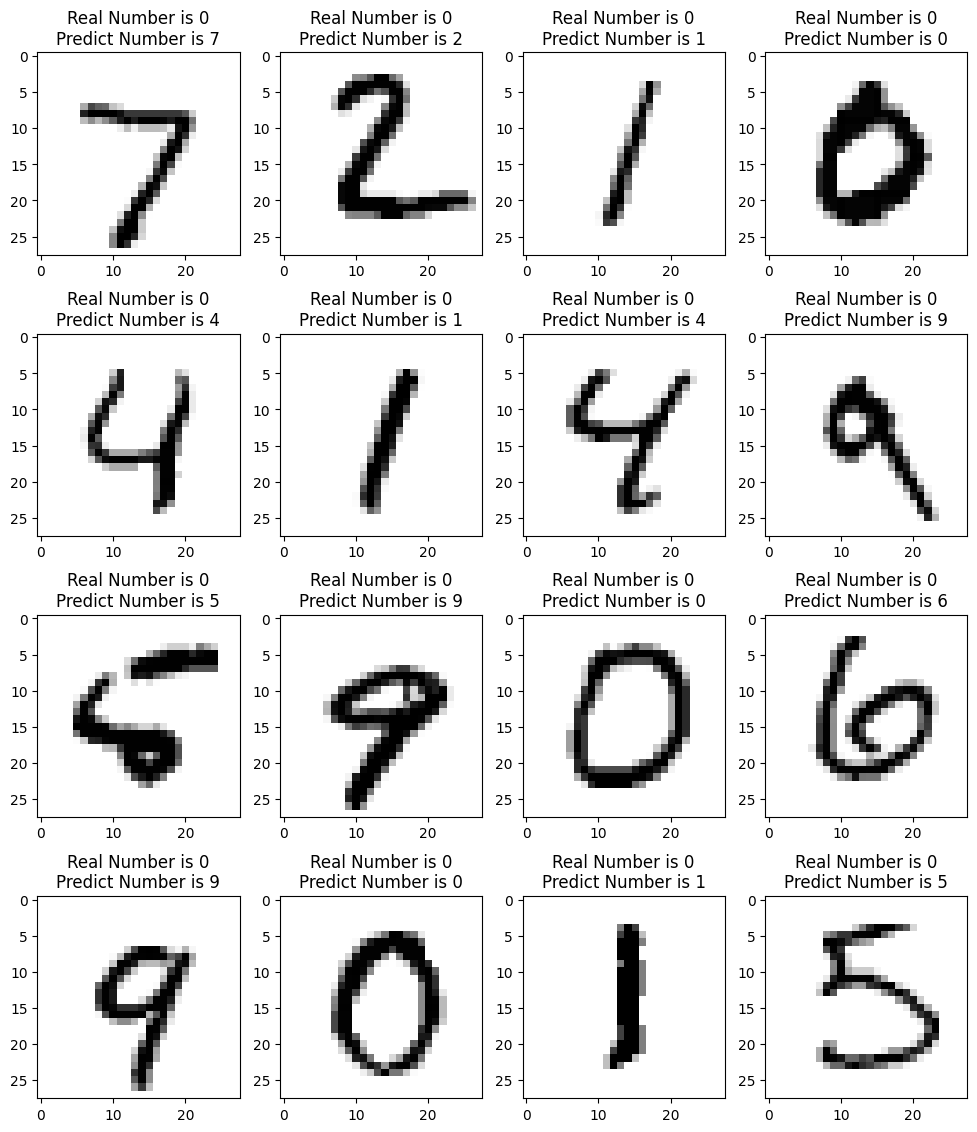

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 

y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [33]:
train_acc = saved_model.evaluate(X_train, y_train, verbose=1)
test_acc = saved_model.evaluate(X_test, y_test, verbose=1)
print('Train loss, Train accuracy :', (train_acc))
print ('.........................')
print('Test loss, Test accuracy:', (test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0645 - accuracy: 0.9921
Train loss, Train accuracy : [0.0118109667673707, 0.9987666606903076]
.........................
Test loss, Test accuracy: [0.06450800597667694, 0.9921000003814697]
